## 01. Import Libraries

In [8]:
# import libraries

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt


## 02. Import Data & Wrangle

In [12]:
# importing our cleaned data set from the last notebook:

df = pd.read_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/stations_formatted.csv', index_col = 0 )

In [18]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
average_temp          float64
dtype: object

In [21]:
# set date to datetime format:

df['date'] = pd.to_datetime(df['date'])
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
average_temp                 float64
dtype: object

In [25]:
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp
0,3255D3E3F33CDC45,classic_bike,2022-03-18 15:38:17,2022-03-18 15:45:34,Mama Johnson Field - 4 St & Jackson St,HB404,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,40.743140,-74.040041,40.736982,-74.027781,casual,2022-03-18,13.9
1,17FA5604A37338F9,electric_bike,2022-03-04 16:44:48,2022-03-04 16:50:45,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-04,-1.9
2,7DEC9ADDB8D6BBE1,electric_bike,2022-03-13 17:44:32,2022-03-13 17:54:44,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-13,-2.3
3,9D69F74EEF231A2E,classic_bike,2022-03-13 15:33:47,2022-03-13 15:41:22,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-13,-2.3
4,C84AE4A9D78A6347,classic_bike,2022-03-11 12:21:18,2022-03-11 12:33:24,Baldwin at Montgomery,JC020,Grove St PATH,JC005,40.723659,-74.064194,40.719586,-74.043117,member,2022-03-11,7.2


In [27]:
# this isn't chronological, lets fix that before continuing forward and setting date as index!

df = df.sort_values(by='date')

In [29]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp
69783,98E8B6334EDA291D,electric_bike,2022-01-01 20:05:31,2022-01-01 20:11:44,8 St & Washington St,HB603,Adams St & 2 St,HB407,40.745984,-74.028199,40.739814,-74.036904,member,2022-01-01,11.6
52966,36588BE94C9C8F68,classic_bike,2022-01-01 16:21:05,2022-01-01 17:15:46,Liberty Light Rail,JC052,Liberty Light Rail,JC052,40.711242,-74.055701,40.711242,-74.055701,casual,2022-01-01,11.6
61498,8492C44EA573AB43,classic_bike,2022-01-01 09:15:25,2022-01-01 09:30:15,Newport Pkwy,JC008,Hudson St & 4 St,HB607,40.728745,-74.032108,40.740973,-74.028603,member,2022-01-01,11.6
71806,2EE9E7BF156DF3D6,electric_bike,2022-01-01 17:04:06,2022-01-01 17:17:57,Sip Ave,JC056,Baldwin at Montgomery,JC020,40.730897,-74.063913,40.723659,-74.064194,casual,2022-01-01,11.6
78321,D78B954095CBA610,classic_bike,2022-01-01 15:52:39,2022-01-01 16:02:36,Journal Square,JC103,Pershing Field,JC024,40.733670,-74.062500,40.742677,-74.051789,casual,2022-01-01,11.6


In [32]:
# let's also export this for future use!

df.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/stations_formatted_chronological.csv')

In [35]:
# now we can set our date as an index in a new DF and see how temp varies throughout the year!

## 03. Data Visualizations

In [41]:
# create a copy of our df with temp as the index!

df_temp = df.set_index('date')
df_temp

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp
date,,,,,,,,,,,,,,
2022-01-01,98E8B6334EDA291D,electric_bike,2022-01-01 20:05:31,2022-01-01 20:11:44,8 St & Washington St,HB603,Adams St & 2 St,HB407,40.745984,-74.028199,40.739814,-74.036904,member,11.6
2022-01-01,36588BE94C9C8F68,classic_bike,2022-01-01 16:21:05,2022-01-01 17:15:46,Liberty Light Rail,JC052,Liberty Light Rail,JC052,40.711242,-74.055701,40.711242,-74.055701,casual,11.6
2022-01-01,8492C44EA573AB43,classic_bike,2022-01-01 09:15:25,2022-01-01 09:30:15,Newport Pkwy,JC008,Hudson St & 4 St,HB607,40.728745,-74.032108,40.740973,-74.028603,member,11.6
2022-01-01,2EE9E7BF156DF3D6,electric_bike,2022-01-01 17:04:06,2022-01-01 17:17:57,Sip Ave,JC056,Baldwin at Montgomery,JC020,40.730897,-74.063913,40.723659,-74.064194,casual,11.6
2022-01-01,D78B954095CBA610,classic_bike,2022-01-01 15:52:39,2022-01-01 16:02:36,Journal Square,JC103,Pershing Field,JC024,40.733670,-74.062500,40.742677,-74.051789,casual,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,767F26062A1B8BE6,classic_bike,2022-12-31 13:59:12,2022-12-31 14:06:34,City Hall - Washington St & 1 St,HB105,Grand St & 14 St,HB506,40.737182,-74.031113,40.754090,-74.031600,casual,8.2
2022-12-31,060E978BA456AF09,electric_bike,2022-12-31 10:38:55,2022-12-31 10:41:36,Madison St & 10 St,HB503,Grand St & 14 St,HB506,40.749943,-74.035865,40.754090,-74.031600,member,8.2
2022-12-31,E3522090A963CA75,classic_bike,2022-12-31 15:58:18,2022-12-31 16:01:27,Madison St & 10 St,HB503,Grand St & 14 St,HB506,40.749943,-74.035865,40.754090,-74.031600,member,8.2


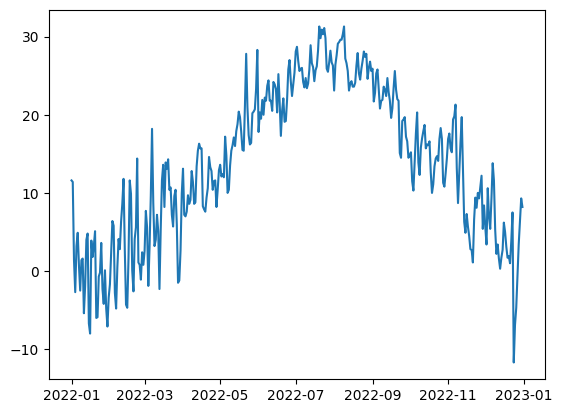

In [61]:
# now plot the temp as a time series!

plt.plot(df_temp['average_temp'])
plt.show()

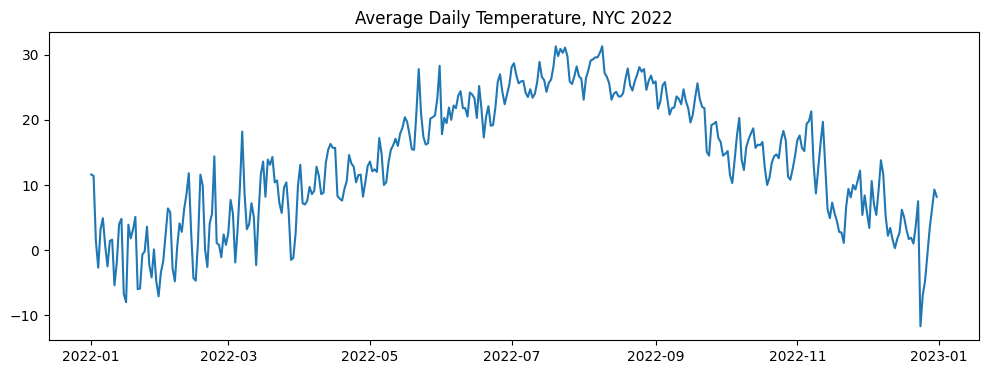

In [64]:
# this is a little cramped, so lets personalize it a bit!

plt.figure(figsize=(12,4))
plt.title('Average Daily Temperature, NYC 2022')
plt.plot(df_temp['average_temp'])
plt.show()

In [66]:
# this is so much better!

In [88]:
# this gives us some good information, but it could be helpful to see how many rides we have per day!
# going to create a new column: 'daily_ride_count'

# first, let's group our data by date! Then take a count of the number of rides (using ride_id) for each group/date
# also going to reset the index, as we don't need our date as the index right now...

df_rides = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()
df_rides

,date,ride_id
0,2022-01-01,581
1,2022-01-02,1232
2,2022-01-03,819
3,2022-01-04,922
4,2022-01-05,911
...,...,...
360,2022-12-27,1046
361,2022-12-28,1379
362,2022-12-29,1597
363,2022-12-30,1925


In [90]:
# now we have the count of rides for each date, we can merge this with the main dataframe (useful info to have!)
# let's rename the column here as 'daily_ride_count' for clarity!

df_rides.rename(columns = {'ride_id':'daily_ride_count'}, inplace = True)
df_rides

,date,daily_ride_count
0,2022-01-01,581
1,2022-01-02,1232
2,2022-01-03,819
3,2022-01-04,922
4,2022-01-05,911
...,...,...
360,2022-12-27,1046
361,2022-12-28,1379
362,2022-12-29,1597
363,2022-12-30,1925


In [95]:
# much better!
# now we can merge this!
# going to use an outer merge to ensure that all rows are included (this could result in some nan vals, but can deal with those later
# merging on the date column

df1 = df.merge(df_rides, on = 'date', how = 'outer', indicator = True)

# we will use the _merge column generated by indicator = True to verify merge completion

print(df1['_merge'].value_counts(dropna = False))

_merge
both          891292
left_only          0
right_only         0
Name: count, dtype: int64


In [97]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,daily_ride_count,_merge
0,98E8B6334EDA291D,electric_bike,2022-01-01 20:05:31,2022-01-01 20:11:44,8 St & Washington St,HB603,Adams St & 2 St,HB407,40.745984,-74.028199,40.739814,-74.036904,member,2022-01-01,11.6,581,both
1,36588BE94C9C8F68,classic_bike,2022-01-01 16:21:05,2022-01-01 17:15:46,Liberty Light Rail,JC052,Liberty Light Rail,JC052,40.711242,-74.055701,40.711242,-74.055701,casual,2022-01-01,11.6,581,both
2,8492C44EA573AB43,classic_bike,2022-01-01 09:15:25,2022-01-01 09:30:15,Newport Pkwy,JC008,Hudson St & 4 St,HB607,40.728745,-74.032108,40.740973,-74.028603,member,2022-01-01,11.6,581,both
3,2EE9E7BF156DF3D6,electric_bike,2022-01-01 17:04:06,2022-01-01 17:17:57,Sip Ave,JC056,Baldwin at Montgomery,JC020,40.730897,-74.063913,40.723659,-74.064194,casual,2022-01-01,11.6,581,both
4,D78B954095CBA610,classic_bike,2022-01-01 15:52:39,2022-01-01 16:02:36,Journal Square,JC103,Pershing Field,JC024,40.733670,-74.062500,40.742677,-74.051789,casual,2022-01-01,11.6,581,both


In [115]:
df1.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,average_temp,daily_ride_count,_merge
891287,767F26062A1B8BE6,classic_bike,2022-12-31 13:59:12,2022-12-31 14:06:34,City Hall - Washington St & 1 St,HB105,Grand St & 14 St,HB506,40.737182,-74.031113,40.754090,-74.031600,casual,2022-12-31,8.2,968,both
891288,060E978BA456AF09,electric_bike,2022-12-31 10:38:55,2022-12-31 10:41:36,Madison St & 10 St,HB503,Grand St & 14 St,HB506,40.749943,-74.035865,40.754090,-74.031600,member,2022-12-31,8.2,968,both
891289,E3522090A963CA75,classic_bike,2022-12-31 15:58:18,2022-12-31 16:01:27,Madison St & 10 St,HB503,Grand St & 14 St,HB506,40.749943,-74.035865,40.754090,-74.031600,member,2022-12-31,8.2,968,both
891290,767DCD249B3F2506,classic_bike,2022-12-31 15:26:17,2022-12-31 15:39:34,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Grand St & 14 St,HB506,40.736982,-74.027781,40.754090,-74.031600,casual,2022-12-31,8.2,968,both
891291,AF19704853DAC9B2,classic_bike,2022-12-31 11:00:57,2022-12-31 11:09:38,Communipaw & Berry Lane,JC084,City Hall,JC003,40.714456,-74.066676,40.717732,-74.043845,member,2022-12-31,8.2,968,both


In [117]:
# performing another check that this worked!
# we should get the value of 581 when printing the subset of the data that is just for jan 1 and 968 for Dec 31

print(df1[df1['date'] == '2022-01-01'].shape)
print(df1[df1['date'] == '2022-12-31'].shape)

(581, 17)
(968, 17)


In [123]:
# now that we know this works, we can take our df1 and make the date the index again so we can plot

df_temp1 = df1.set_index('date')
df_temp1

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,average_temp,daily_ride_count,_merge
date,,,,,,,,,,,,,,,,
2022-01-01,98E8B6334EDA291D,electric_bike,2022-01-01 20:05:31,2022-01-01 20:11:44,8 St & Washington St,HB603,Adams St & 2 St,HB407,40.745984,-74.028199,40.739814,-74.036904,member,11.6,581,both
2022-01-01,36588BE94C9C8F68,classic_bike,2022-01-01 16:21:05,2022-01-01 17:15:46,Liberty Light Rail,JC052,Liberty Light Rail,JC052,40.711242,-74.055701,40.711242,-74.055701,casual,11.6,581,both
2022-01-01,8492C44EA573AB43,classic_bike,2022-01-01 09:15:25,2022-01-01 09:30:15,Newport Pkwy,JC008,Hudson St & 4 St,HB607,40.728745,-74.032108,40.740973,-74.028603,member,11.6,581,both
2022-01-01,2EE9E7BF156DF3D6,electric_bike,2022-01-01 17:04:06,2022-01-01 17:17:57,Sip Ave,JC056,Baldwin at Montgomery,JC020,40.730897,-74.063913,40.723659,-74.064194,casual,11.6,581,both
2022-01-01,D78B954095CBA610,classic_bike,2022-01-01 15:52:39,2022-01-01 16:02:36,Journal Square,JC103,Pershing Field,JC024,40.733670,-74.062500,40.742677,-74.051789,casual,11.6,581,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,767F26062A1B8BE6,classic_bike,2022-12-31 13:59:12,2022-12-31 14:06:34,City Hall - Washington St & 1 St,HB105,Grand St & 14 St,HB506,40.737182,-74.031113,40.754090,-74.031600,casual,8.2,968,both
2022-12-31,060E978BA456AF09,electric_bike,2022-12-31 10:38:55,2022-12-31 10:41:36,Madison St & 10 St,HB503,Grand St & 14 St,HB506,40.749943,-74.035865,40.754090,-74.031600,member,8.2,968,both
2022-12-31,E3522090A963CA75,classic_bike,2022-12-31 15:58:18,2022-12-31 16:01:27,Madison St & 10 St,HB503,Grand St & 14 St,HB506,40.749943,-74.035865,40.754090,-74.031600,member,8.2,968,both


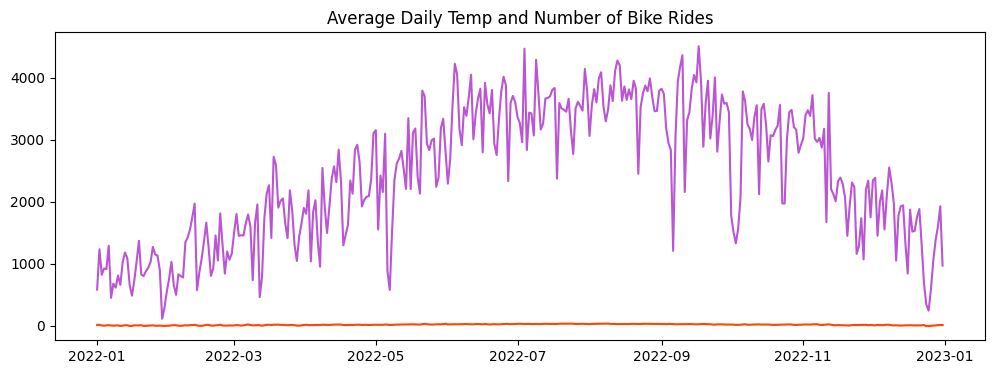

In [160]:
# now we can create a line chart of bike trip counts and temps on a dual axis!

# first start with our figure size (12,4) worked well above

plt.figure(figsize=(12,4))
plt.title('Average Daily Temp and Number of Bike Rides')
plt.plot(df_temp1['average_temp'], color = 'orangered')
plt.plot(df_temp1['daily_ride_count'], color = 'mediumorchid')
plt.show()

While this does give us *some* information, it isn't very informative as the scale the two units are too different for us to gather any meaningful relationship into how temperature has an impact on rider activity!

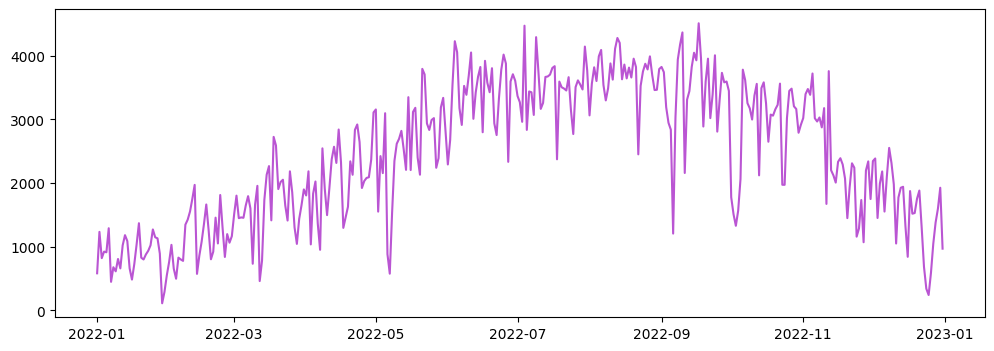

In [162]:
# lets plot this using another method, to see if we can create something more insightful!
# using an Object-Oriented approach might allow us to add more detail/insight

fig,ax = plt.subplots(figsize=(12,4))

# now that we have defined our figure and axes, we can start to build out our plot!

ax.plot(df_temp1['daily_ride_count'], color = 'mediumorchid')
plt.show()

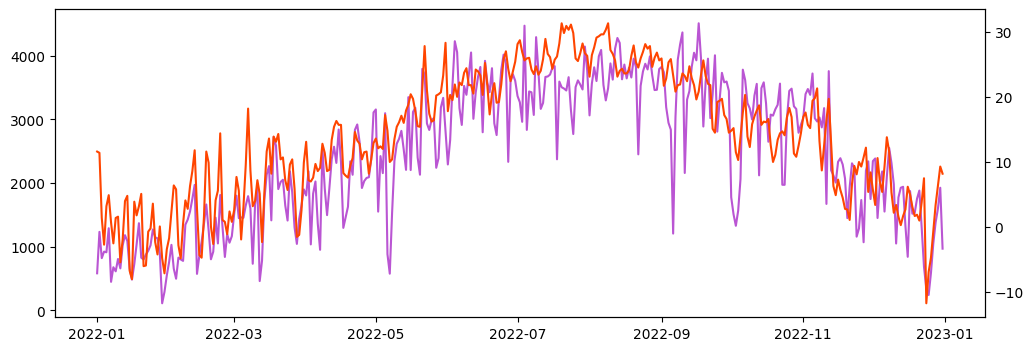

In [168]:
# we've plotted the bike rides, now lets work on adding our daily temp to this plot to see if there's any relationship!
# we are going to have to use a dual axis in order for both columns to be plotted on our line graph.

# first, our code from above:

fig,ax = plt.subplots(figsize=(12,4))
ax.plot(df_temp1['daily_ride_count'], color = 'mediumorchid')

# now using twinx() to create another line for temp.

ax2 = ax.twinx()
ax2.plot(df_temp1['average_temp'], color = 'orangered')
plt.show()

In [170]:
# looking at this, we can see that the units for ride count are along the left hand side, and the units for temp are along the right
# this plot would look a LOT better and be a LOT more legible with a Title and Axis Titles!

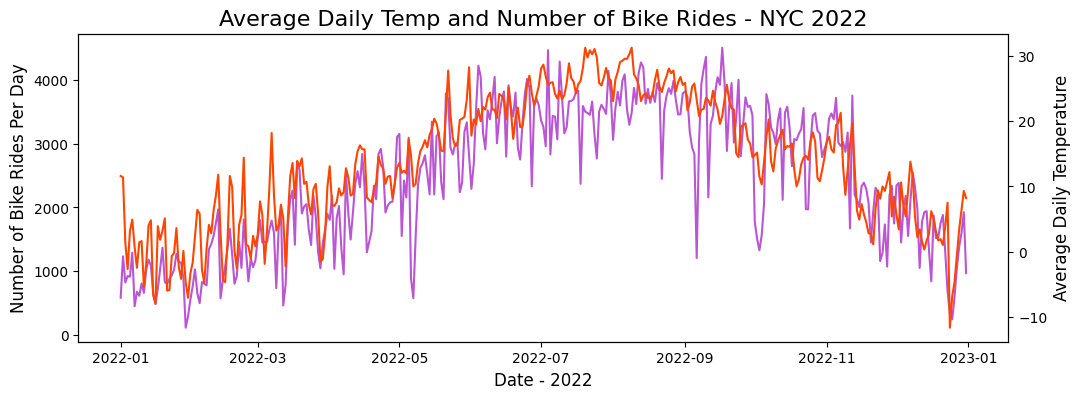

In [172]:
# first, define the figure size / axes

fig,ax = plt.subplots(figsize=(12,4))

# now plot our bike rides BUT add in title / labels

ax.plot(df_temp1['daily_ride_count'], color = 'mediumorchid')
ax.set_xlabel("Date - 2022", fontsize = 12) # x-axis
ax.set_ylabel("Number of Bike Rides Per Day", fontsize = 12) # y-axis

# now plot our daily avg temp! first, use twinx

ax2 = ax.twinx()
ax2.plot(df_temp1['average_temp'], color = 'orangered')
ax2.set_ylabel('Average Daily Temperature', fontsize = 12) # x-axis was set above! so only y-axis here

# finally, add title then show!

plt.title('Average Daily Temp and Number of Bike Rides - NYC 2022', fontsize = 16)
plt.show()

In [176]:
# this gives us a lot of good information, and we can see that warmer weather does appear to impact rider activity
# This is a little busy, however, so let's create another where each line graph is stacked, instead of overlapping!

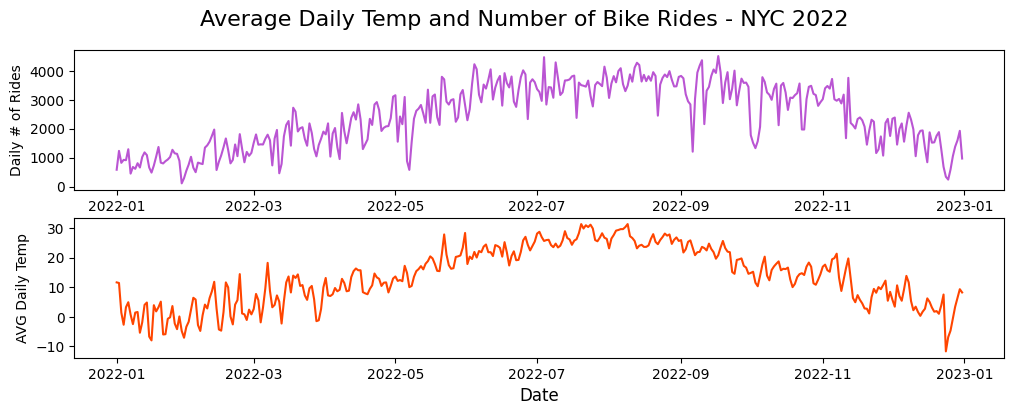

In [199]:
# going to use subplots to create a plot with 2 separate axes:

fig,ax = plt.subplots(2, figsize = (12,4))

# using ax[0] as our first axis to plot our bike ride info:

ax[0].plot(df_temp1['daily_ride_count'], color = 'mediumorchid')
ax[0].set_ylabel("Daily # of Rides", fontsize = 10)

# using ax[1] as our second axis to plot our temp info:

ax[1].plot(df_temp1['average_temp'], color = 'orangered')
ax[1].set_xlabel('Date', fontsize = 12)
ax[1].set_ylabel('AVG Daily Temp', fontsize = 10)

# adding a title and showing!

plt.suptitle('Average Daily Temp and Number of Bike Rides - NYC 2022', fontsize = 16)
plt.show()

I used matplotlib and the object oriented approach to create a more detailed and informative line plot that shows both the average daily temp and the daily count of bike rides. By using the subplot method, I was able to create two different (but equally informative) line graphs. One where the data is plotted on the same chart, overlapping, an another where the charts are stacked. While the relationship betwen temperature and ride count is clearly visible, the overlapping (shared axis) chart shows this more easily. It is a little busy, so if legibility is a concern, then utilizing the stacked chart is another equally informative option!

In [202]:
# quick export of df1, where we have ride counts per date, in case we need it later!

df1.to_csv('/Users/piperdutcher/Documents/Data-Visualizations/Bike-Sharing/Data/chronological_w_ride_counts.csv')